In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

%matplotlib inline

In [4]:
def filter_seg(filename):
    img = Image.open('./data/Train/CameraSeg/'+filename)
    label = np.array(img, dtype=np.uint8)
    label[label == 6] = 7
    label[np.isin(label, [7,10], invert=True)] = 0
    label[490:,:,:][label[490:,:,:] != 7] = 0
    return label

def show_image(filename):
    rgb = Image.open('./data/Train/CameraRGB/'+filename)
    plt.imshow(np.asarray(rgb))
    plt.show()
    seg = Image.open('./data/Train/CameraSeg/'+filename)
    plt.imshow(np.asarray(seg)[:,:,0])
    plt.show()
    filtered_seg = filter_seg(filename)
    plt.imshow(np.asarray(filtered_seg)[:,:,0])
    plt.show()

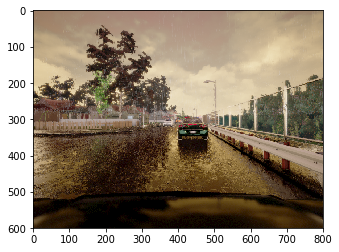

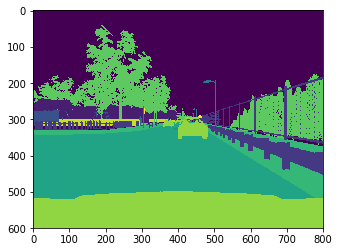

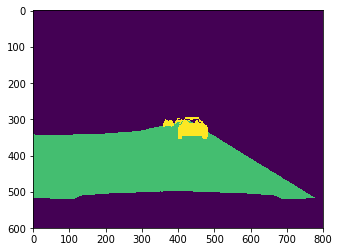

In [8]:
filename = '900.png'
show_image(filename)

In [19]:
if not os.path.exists('../data/Test'):
    os.makedirs('../data/Test/CameraRGB')
    os.makedirs('../data/Test/CameraSeg')
    
img_files = [str(filename) + '.png' for filename in range(950,1000)]
for filename in img_files:
    rgb = '../data/Train/CameraRGB/' + filename
    seg = '../data/Train/CameraSeg/' + filename
    if os.path.isfile(rgb):
        shutil.move(rgb, '../data/Test/CameraRGB/')
    if os.path.isfile(seg):
        shutil.move(seg, '../data/Test/CameraSeg/')

In [13]:
import tensorflow as tf

x = tf.ones([10, 35, 35, 4096], dtype=tf.float32)
y = tf.layers.conv2d_transpose(x, 3, 4, 2, padding="same")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(y)
    print(x.get_shape())
    print(y.get_shape())

(10, 35, 35, 4096)
(10, 70, 70, 3)
